In [469]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Regresion con una variable

In [2]:
valores = read_csv (".\p1\ex1data1.csv", header=None).to_numpy() 
valores

array([[ 6.1101 , 17.592  ],
       [ 5.5277 ,  9.1302 ],
       [ 8.5186 , 13.662  ],
       [ 7.0032 , 11.854  ],
       [ 5.8598 ,  6.8233 ],
       [ 8.3829 , 11.886  ],
       [ 7.4764 ,  4.3483 ],
       [ 8.5781 , 12.     ],
       [ 6.4862 ,  6.5987 ],
       [ 5.0546 ,  3.8166 ],
       [ 5.7107 ,  3.2522 ],
       [14.164  , 15.505  ],
       [ 5.734  ,  3.1551 ],
       [ 8.4084 ,  7.2258 ],
       [ 5.6407 ,  0.71618],
       [ 5.3794 ,  3.5129 ],
       [ 6.3654 ,  5.3048 ],
       [ 5.1301 ,  0.56077],
       [ 6.4296 ,  3.6518 ],
       [ 7.0708 ,  5.3893 ],
       [ 6.1891 ,  3.1386 ],
       [20.27   , 21.767  ],
       [ 5.4901 ,  4.263  ],
       [ 6.3261 ,  5.1875 ],
       [ 5.5649 ,  3.0825 ],
       [18.945  , 22.638  ],
       [12.828  , 13.501  ],
       [10.957  ,  7.0467 ],
       [13.176  , 14.692  ],
       [22.203  , 24.147  ],
       [ 5.2524 , -1.22   ],
       [ 6.5894 ,  5.9966 ],
       [ 9.2482 , 12.134  ],
       [ 5.8918 ,  1.8495 ],
       [ 8.211

## Funciones

In [510]:
def h0(teta0,teta1,x):
    return teta0 + teta1*x

In [511]:
def funcion_coste(h0,teta0,teta1,x,y,m):
    """
    Devuelve el valor de la funcion de coste para un conjunto de datos sobre el que obtener una función de aproximación
    h0     -- función que define la recta de aproximación
    teta0  -- primer parámetro de la función de la recta
    teta1  -- segundo parámetro de la función de la recta
    x      -- vector de valores para el eje X 
    y      -- vector de valores para el eje Y
    m      -- dimensión de los valores que se tratan (tamaño del conjunto)
    """
    return (1/(2*m))*sum((h0(teta0,teta1,x)-y)**2)

In [512]:
def descenso_gradiente(iteraciones, funcion_coste, alpha, h0, teta0, teta1, x, y, m):
    """
    Aplica el método de descenso de gradiente sobre el conjunto de datos y devuelve los parámetros que más ajustan 
    la recta de la función de aproximación (minimizan el valor de la función de coste).
    iteraciones   -- nº iteraciones que realiza la función
    funcion_coste -- función de coste definida
    alpha         -- valor que ajusta la corrección de los valores teta0 y teta1
    h0            -- función que define la recta de aproximación
    teta0         -- primer parámetro de la función de la recta
    teta1         -- segundo parámetro de la función de la recta
    x             -- vector de valores para el eje X 
    y             -- vector de valores para el eje Y
    m             -- dimensión de los valores que se tratan (tamaño del conjunto)
    """
    for i in range(iteraciones):
        coste_viejo = funcion_coste(h0,teta0,teta1,x,y,m)
        temp0 = teta0 - alpha*(1/m)*(sum(h0(teta0,teta1,x)-y))
        temp1 = teta1 - alpha*(1/m)*(sum((h0(teta0,teta1,x)-y)*x))
        teta0 = temp0
        teta1 = temp1
        coste_nuevo = funcion_coste(h0,teta0,teta1,x,y,m)
        if(abs(coste_viejo-coste_nuevo) < np.exp(-9)):
            print(coste_viejo)
            print(coste_nuevo)
            print(i)
            return (teta0, teta1)
    print(i)
    return (teta0, teta1)

In [513]:
k = descenso_gradiente(1500, funcion_coste, 0.01, h0, 0, 0, valores[:,0], valores[:,1],valores.shape[0])

4.511206445705469
4.511083132959974
1036


<Figure size 432x288 with 0 Axes>

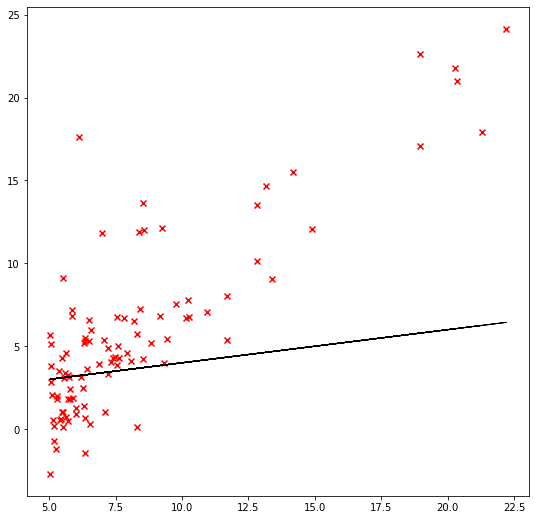

<Figure size 432x288 with 0 Axes>

In [520]:
plt.figure()
fig= plt.figure(figsize=(9,9))
plt.scatter(valores[:,0],valores[:,1],c='red',marker="x")
plt.plot(x,h0(2,0.2,x), c='black',linewidth=1)
plt.show()
plt.savefig('plto.png')

<Figure size 432x288 with 0 Axes>

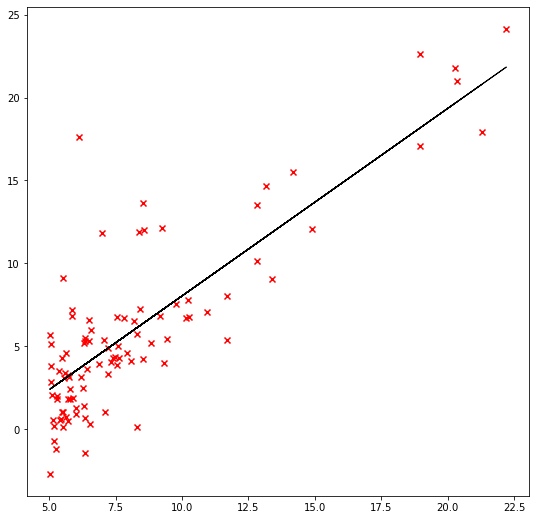

<Figure size 432x288 with 0 Axes>

In [521]:
plt.figure()
fig= plt.figure(figsize=(9,9))
plt.scatter(valores[:,0],valores[:,1],c='red',marker="x")
plt.plot(x,h0(k[0],k[1],x), c='black',linewidth=1)
plt.show()
plt.savefig('no.png')

In [25]:
h0(k[0],k[1],7)

4.63711628775917

## Visualizacion de la funcion de coste

In [146]:
def make_data(t0_range, t1_range, X, Y):
    step = 0.1
    Theta0 = np.arange(t0_range[0], t0_range[1], step)
    Theta1 = np.arange(t1_range[0], t1_range[1], step)
    Theta0, Theta1 = np.meshgrid(Theta0, Theta1)
    Coste = np.empty_like(Theta0)
    for ix, iy in np.ndindex(Theta0.shape):
        Coste[ix, iy] = coste(X, Y, [Theta0[ix, iy], Theta1[ix, iy]])
    return [Theta0, Theta1, Coste]

In [147]:
make_data([-10,10],[1,4],valores[:,0],valores[:,1])

TypeError: 'numpy.ndarray' object is not callable

# Regresion con dos variables

In [139]:
valores_reg2 = read_csv (".\p1\ex1data2.csv", header=None).to_numpy().astype(float) 
valores_reg2

array([[2.10400e+03, 3.00000e+00, 3.99900e+05],
       [1.60000e+03, 3.00000e+00, 3.29900e+05],
       [2.40000e+03, 3.00000e+00, 3.69000e+05],
       [1.41600e+03, 2.00000e+00, 2.32000e+05],
       [3.00000e+03, 4.00000e+00, 5.39900e+05],
       [1.98500e+03, 4.00000e+00, 2.99900e+05],
       [1.53400e+03, 3.00000e+00, 3.14900e+05],
       [1.42700e+03, 3.00000e+00, 1.98999e+05],
       [1.38000e+03, 3.00000e+00, 2.12000e+05],
       [1.49400e+03, 3.00000e+00, 2.42500e+05],
       [1.94000e+03, 4.00000e+00, 2.39999e+05],
       [2.00000e+03, 3.00000e+00, 3.47000e+05],
       [1.89000e+03, 3.00000e+00, 3.29999e+05],
       [4.47800e+03, 5.00000e+00, 6.99900e+05],
       [1.26800e+03, 3.00000e+00, 2.59900e+05],
       [2.30000e+03, 4.00000e+00, 4.49900e+05],
       [1.32000e+03, 2.00000e+00, 2.99900e+05],
       [1.23600e+03, 3.00000e+00, 1.99900e+05],
       [2.60900e+03, 4.00000e+00, 4.99998e+05],
       [3.03100e+03, 4.00000e+00, 5.99000e+05],
       [1.76700e+03, 3.00000e+00, 2.5290

In [380]:
def h0_multivariable(tetas,xs):
    return np.matmul(xs[:,:-1],tetas)

In [260]:
def normaliza_matriz(matriz):
    """
    Devuelve la misma matriz en dimensiones con los valores normalizados, un vector mu con la media de cada columna y un 
    vector sigma con la media de cada columna
    """
    norm = matriz.copy()
    mu = np.mean(matriz[:,],axis=1)
    sigma = np.std(matriz[:,],axis=1)
    for i in range(matriz.shape[1]):
        norm[:,i] = (matriz[:,i] - mu[i])/sigma[i]
    norm = np.hstack([np.ones([norm.shape[0],1]),norm])
    return norm,mu,sigma 

In [261]:
a,b,c = normaliza_matriz(valores_reg2)

In [317]:
def funcion_coste_multivar(h0,tetas,x,m):
    """
    Devuelve el valor de la funcion de coste para un conjunto de datos sobre el que obtener una función de aproximación
    h0     -- función que define la recta de aproximación
    teta0  -- primer parámetro de la función de la recta
    teta1  -- segundo parámetro de la función de la recta
    x      -- vector de valores para el eje X 
    y      -- vector de valores para el eje Y
    m      -- dimensión de los valores que se tratan (tamaño del conjunto)
    """
    return (1/(2*m))*sum((h0(tetas,x)-x[:,-1])**2)

In [412]:
def descenso_gradiente_multivariable(iteraciones, funcion_coste, alpha, h0, tetas, matriz,m):
    """
    Aplica el método de descenso de gradiente sobre el conjunto de datos y devuelve los parámetros que más ajustan 
    la recta de la función de aproximación (minimizan el valor de la función de coste).
    iteraciones   -- nº iteraciones que realiza la función
    funcion_coste -- función de coste definida
    alpha         -- valor que ajusta la corrección de los valores teta0 y teta1
    h0            -- función que define la recta de aproximación
    tetas         -- vector de valores para los parametros de ajuste de la función de aproximación 
    matriz        -- matriz de valores 
    """
    for i in range(iteraciones):
        temps = tetas.copy()
        coste_viejo = funcion_coste(h0,tetas,matriz,m)
        for j in range(matriz.shape[1]):
            temps = temps - np.matmul(alpha*(1/m)*(h0(tetas,matriz)-matriz[:,-1]),a[:,:-1])
            tetas = temps
        coste_nuevo = funcion_coste(h0,tetas,matriz,m)
        if(abs(coste_viejo-coste_nuevo) < np.exp(-3)):
            print(coste_viejo)
            print(coste_nuevo)
            print(i)
            return (tetas)
    print(i)
    return (tetas)

In [413]:
LAS_VARIABLES = descenso_gradiente_multivariable(1500,funcion_coste_multivar,0.01,h0_multivariable,tetas,a,a.shape[0])

0.5510906028095736
0.5069928516656662
6


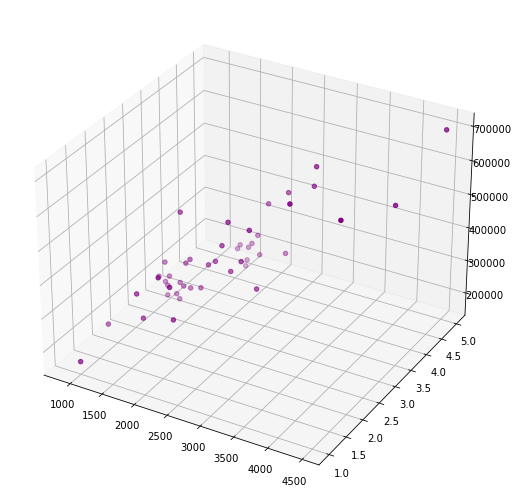

In [98]:
x = valores_reg2[:,0]
y = valores_reg2[:,1]
z = valores_reg2[:,2]
fig= plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')
ax.scatter(xs=x, ys=y, zs=z,c='purple')

In [422]:
def h0_multivariable_fila(tetas,xs):
    return sum(xs*tetas)

In [494]:
LAS_VARIABLES

array([ 0.26991759, -0.18878413, -0.1922474 ])

In [495]:
h0_multivariable_fila(LAS_VARIABLES,valores_reg2[0,])

-76312.39577503345

In [496]:
valores_reg2[0,-1]

399900.0

# Ecuacion normal

In [433]:
def ecuacion_normal(matriz):
    mtrans = np.transpose(matriz)
    print(mtrans.shape)
    prod = np.matmul(mtrans,matriz)
    print(prod.shape)
    inversa = np.linalg.pinv(prod)
    print(inversa.shape)
    inv_prod = np.matmul(inversa, mtrans)
    print(inv_prod.shape)
    return np.matmul(inv_prod,matriz[:,-1])

In [490]:
valores_aprox = ecuacion_normal(valores_reg2)

(3, 47)
(3, 3)
(3, 3)
(3, 47)


In [ ]:
def funcion(tetas,xs):
    return np.matmul(xs[:,:-1],tetas)

In [506]:
z = h0_multivariable(valores_aprox,np.hstack([np.ones([valores_reg2.shape[0],1]),valores_reg2]))*100000

In [524]:
z

array([300004.98523914, 300003.79105368, 300005.68658616, 200003.35508116,
       400007.10823556, 400004.70327873, 300003.63467225, 300003.38114478,
       300003.26978225, 300003.53989563, 400004.59665503, 300004.73881992,
       300004.4781842 , 500010.61023186, 300003.0044077 , 400005.44964465,
       200003.12761727, 300002.9285864 , 400006.18179406, 400007.18168745,
       300004.18674609, 200004.47344533, 300003.80053134, 400004.64878217,
       300009.2170154 , 300002.60634588, 300003.45459667, 300005.98513252,
       300005.21270304, 300006.24813765, 200004.35734396, 100002.36940423,
       400004.83359659, 300007.43284545, 400004.29100042, 300003.40483894,
       300002.93569465, 400005.05158283, 400009.98707551, 400005.12266529,
       200003.94269623, 300005.30274083, 400006.08227861, 300002.84328744,
       200002.01873077, 400004.38814646, 300002.85039569])

In [489]:
valores_reg2[:,-1]

array([399900., 329900., 369000., 232000., 539900., 299900., 314900.,
       198999., 212000., 242500., 239999., 347000., 329999., 699900.,
       259900., 449900., 299900., 199900., 499998., 599000., 252900.,
       255000., 242900., 259900., 573900., 249900., 464500., 469000.,
       475000., 299900., 349900., 169900., 314900., 579900., 285900.,
       249900., 229900., 345000., 549000., 287000., 368500., 329900.,
       314000., 299000., 179900., 299900., 239500.])

In [527]:
np.mean(valores_reg2[:,-1]-z)

23386.642545576713

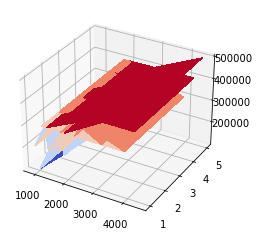

In [507]:
x = valores_reg2[:,0]
y = valores_reg2[:,1]
Z = np.tile(z,(len(x),1))
X,Y = np.meshgrid(x,y)
fig= plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z,cmap =cm.coolwarm,antialiased=False)
plt.show()